# Groupe sur le traitement numérique d'images
## MEMBRES DU GROUPE:
### - BROU Marie-Eunice

### - ESSOSSIMA Ruth

### - KIBAMBA MFOUTOU Exaucey

### - MIDJE Valère

### - WOLA Asaph

In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



# 1.1. Importer une image
Chargeons l'image à partir d'un fichier avec la fonction imread() d'OpenCV (cv2). Nous appellerons cv2.imread() et lui transmettrons le chemin vers le fichier image test.jpg :

In [32]:
from PIL import Image
import numpy as np
import os

# Vérifier si le fichier de l'image existe
image_file = 'chemise.jpg'
if not os.path.isfile(image_file):
    print("Je n'ai pas trouvé l'image.")
    exit()
    




In [33]:
im = np.array(Image.open('chemise.jpg'))

print(type(im))

print(im.dtype)

print(im.shape)

<class 'numpy.ndarray'>
uint8
(558, 615, 3)


L'ordre des couleurs (canaux) est RVB (rouge, vert, bleu). Notez que cela est différent du cas de la lecture avec cv2.imread() d'OpenCV.

Si vous convertissez l'image en niveaux de gris avec convert('L') puis que vous la transmettez à np.array(), elle renvoie un ndarray 2D dont la forme est (ligne(hauteur), colonne(largeur)).

In [6]:
im_gray = np.array(Image.open('chemise.jpg').convert('L'))

print(im_gray.shape)

(558, 615)


on peut également obtenir ndarray à partir de PIL.Image avec np.asarray(). np.array() renvoie un ndarray réinscriptible, tandis que np.asarray() renvoie un non-réinscriptiblendarray.

Pour np.array(), nous pouvons modifier la valeur de l'élément (pixel).

In [7]:
print(im.flags.writeable)

print(im[0, 0, 0])

im[0, 0, 0] = 0

print(im[0, 0, 0])

True
255
0


# Obtenir et définir (modifier) les valeurs de pixel
Vous pouvez obtenir la valeur d'un pixel en spécifiant les coordonnées à l'index [ligne, colonnes] de ndarray. Notez que l'ordre est y, x en coordonnées xy. L'origine est en haut à gauche.

(558, 615, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
Do you want to start the blank deletion procedure? (Yes/No): yes


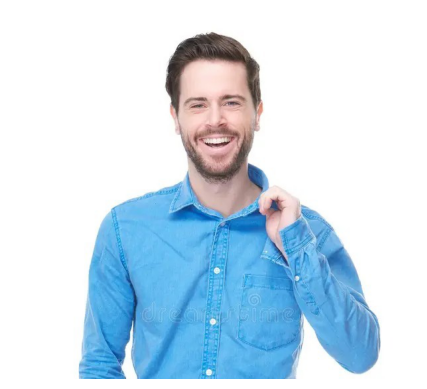

In [34]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
# sil ne trouve pas l'image il ressort et dit je n'ai pas trouvé d'image


im = np.array(Image.open('chemise.jpg'))

print(im.shape)

print(im)
# demander s'il veut lancer  la procédure de suppression de blancs
# Demander à l'utilisateur s'il veut lancer la procédure de suppression des blancs
response = input("Do you want to start the blank deletion procedure? (Yes/No): ")
if response.lower() != 'yes':
    print("The blank deletion procedure has been canceled.")
    exit()
    
plt.imshow(im)
plt.axis('off')
plt.show()    

# Histogramme de pixels

Nous affichons l'histogramme de notre image qui représente la répartition des pixels selon leur intensité (de 0 à 255). Les trois canaux (rouge, vert et bleu) ont chacun un histogramme correspondant. Pour créer l'histogramme de notre image de test, nous allons utiliser la fonction histogram() du module d'exposition. Pour le tracer, nous utilisons la bibliothèque matplotlib (assurez-vous que la bibliothèque matplotlib est installée). Le script suivant affiche l'histogramme de pixels de notre image de test pour chaque canal :

classe : <class 'numpy.ndarray'>
type : uint8
taille : (558, 615)
modifiable : True


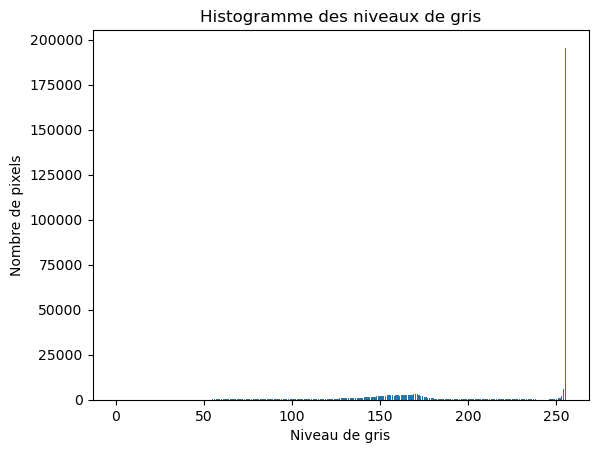

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open("chemise.jpg")
image_array = np.array(image.convert("L"))  # Conversion en niveaux de gris
print('classe :', type(image_array))
print('type :', image_array.dtype)
print('taille :', image_array.shape)
print('modifiable :', image_array.flags.writeable)

histogram = np.histogram(image_array.flatten(), bins=256, range=[0, 256])

x = np.arange(256)  # Valeurs de l'axe des abscisses
y = histogram[0]  # Valeurs de l'histogramme

plt.bar(x, y)
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme des niveaux de gris')
plt.show()


# redimensionner l'image
En spécifiant une zone avec une tranche, vous pouvez la découper en rectangle.

In [36]:
from PIL import Image
import numpy as np

# Charger l'image
im = np.array(Image.open('chemise.jpg'))

print(im.shape)

# Trouver les indices des lignes et colonnes non-blanches
non_white_rows = np.where(np.any(im != 255, axis=1))[0]
non_white_cols = np.where(np.any(im != 255, axis=0))[0]

# Découper l'image en utilisant les indices non-blanches
im_trimmed = im[non_white_rows[0]:non_white_rows[-1]+1, non_white_cols[0]:non_white_cols[-1]+1]

print(im_trimmed.shape)

# Sauvegarder l'image découpée
Image.fromarray(im_trimmed).save('chemise_trim.jpg')


(558, 615, 3)
(536, 484, 3)


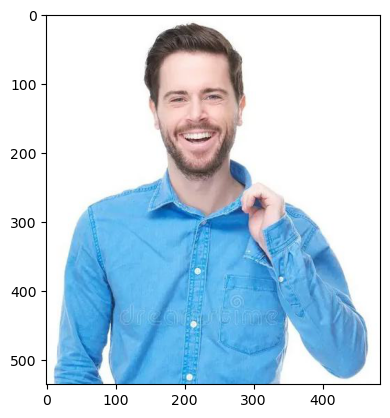

In [20]:
import matplotlib.pyplot as plt

# Charger l'image concaténée
pil_img = Image.open('chemise_trim.jpg')

# Afficher l'image
plt.imshow(pil_img)
#plt.axis('off')
plt.show()
# montrer le maximum, afficher les dernières coordonnées sur l'abcisse et l'ordonnée

# Trouver le niveau de gris avec le pixel

In [13]:
print(im[100, 150, 0])

print(im[300, 300, 1])

print(im[400, 200, 2])

255
167
239


# Image en niveaux de gris
Pour convertir une image couleur en image en niveaux de gris, utilisez la fonction cvtColor() de cv2 qui prend l'image d'origine et l'attribut COLOR_RGB2GRAY comme paramètres. Le script est le suivant :

Do you want to start the edge detection procedure ? (yes/No): yes


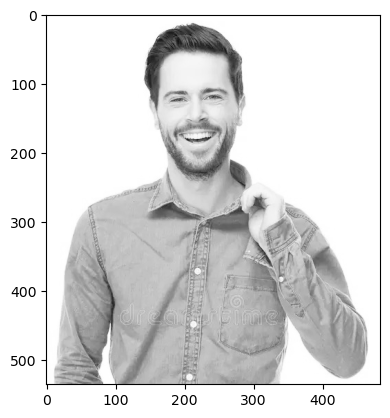

Image size in grayscale : (536, 484)
Execution time :  2.9637558460235596 seconds


In [22]:
import time
start_time = time.time()
# Demander à l'utilisateur s'il veut lancer la procédure de détection de contours
response = input("Do you want to start the edge detection procedure ? (yes/No): ")
if response.lower() != 'yes':
    print("The contour detection procedure has been cancelled.")
else:
    grey_image = cv2.cvtColor(im_trimmed, cv2.COLOR_RGB2GRAY)
    plt.imshow(grey_image, cmap = 'Greys_r')
    plt.show()
    print("Image size in grayscale :", grey_image.shape)
    
end_time=time.time() 
execution_time = end_time-start_time
print("Execution time : ", execution_time, "seconds")
 

# Détection des contours
## Filtres linéaires :

Filtre Sobel

Filtre Prewitt

Filtre Roberts

Filtre astucieux

sobel filter time = 0.029006481170654297 seconde
prewitt filter time = 0.1990518569946289 seconde
robert filter time = 0.009999513626098633 seconde
canny filter time = 0.007004261016845703 seconde


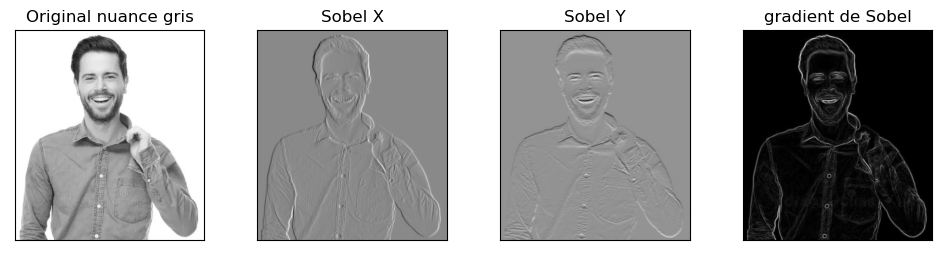

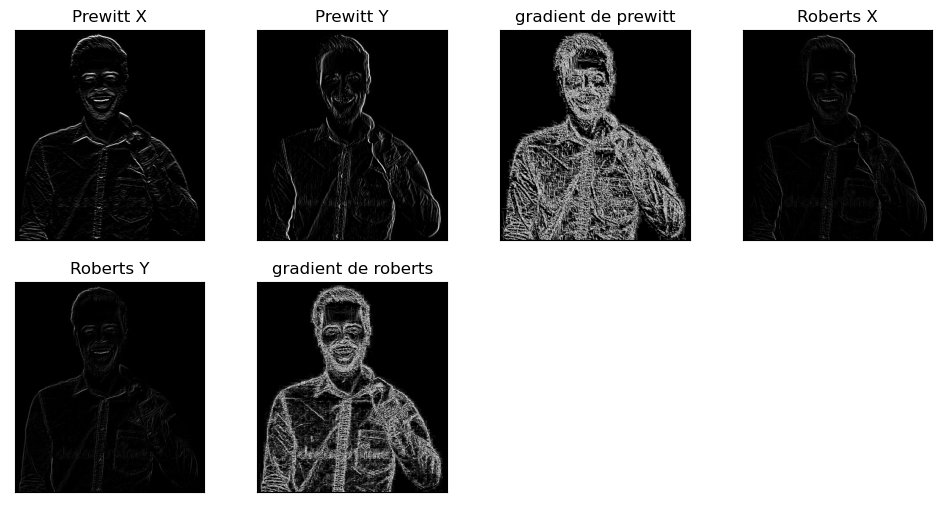

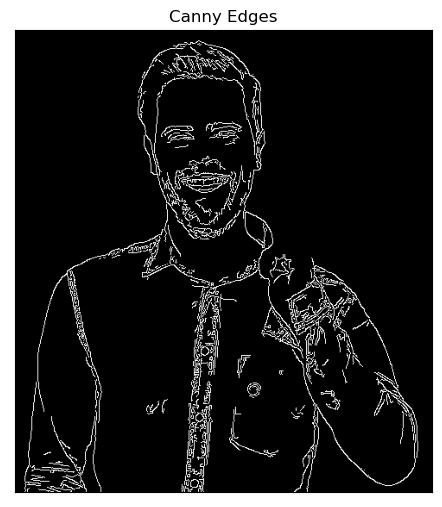

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

img = cv2.imread('chemise_trim.jpg', 0)

# Sobel
start_time = time.time()
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
gradient_sobel = np.sqrt(sobelx**2 + sobely**2)
sobel_time = time.time() - start_time

# Prewitt
start_time = time.time()
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)
prewittx = cv2.filter2D(img,-1,kernelx)
prewitty = cv2.filter2D(img,-1,kernely)
gradient_prewitt = np.sqrt(prewittx**2 + prewitty**2)
prewitt_time = time.time() - start_time

# Roberts
start_time = time.time()
kernelx = np.array([[0,1],[-1,0]],dtype=int)
kernely = np.array([[1,0],[0,-1]],dtype=int)
robertsx = cv2.filter2D(img,-1,kernelx)
robertsy = cv2.filter2D(img,-1,kernely)
gradient_roberts = np.sqrt(robertsx**2 + robertsy**2)
robert_time = time.time() - start_time

# Canny
start_time = time.time()
edges = cv2.Canny(img,100,200)
canny_time = time.time() - start_time

print("sobel filter time =", sobel_time, "seconde")
print("prewitt filter time =", prewitt_time, "seconde")
print("robert filter time =", robert_time, "seconde")
print("canny filter time =", canny_time, "seconde")

# Première figure
plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1), plt.imshow(img, cmap='gray')
plt.title('Original nuance gris'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 2), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 3), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 4), plt.imshow(gradient_sobel, cmap='gray')
plt.title('gradient de Sobel'), plt.xticks([]), plt.yticks([])

# Deuxième figure
plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1), plt.imshow(prewittx, cmap='gray')
plt.title('Prewitt X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 2), plt.imshow(prewitty, cmap='gray')
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 3), plt.imshow(gradient_prewitt, cmap='gray')
plt.title('gradient de prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 4), plt.imshow(robertsx, cmap='gray')
plt.title('Roberts X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 5), plt.imshow(robertsy, cmap='gray')
plt.title('Roberts Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 6), plt.imshow(gradient_roberts, cmap='gray')
plt.title('gradient de roberts'), plt.xticks([]), plt.yticks([])


# Afficher les images des contours Canny dans une troisième figure
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges'), plt.xticks([]), plt.yticks([])

plt.show()


sobel_magnitude = 9045.812401326926
prewitt_magnitude = 15.91
roberts_magnitude = 15.91
canny_magnitude = 255


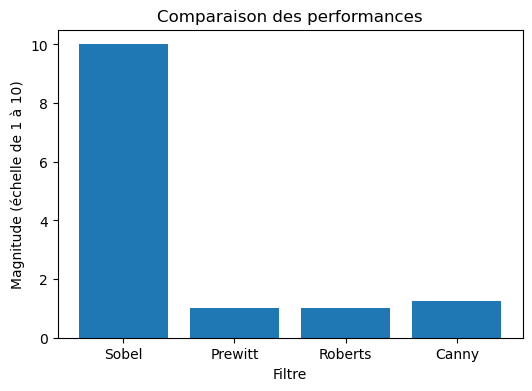

In [24]:
# Calcul des performances
sobel_magnitude = np.max(gradient_sobel)
prewitt_magnitude = np.max(gradient_prewitt)
roberts_magnitude = np.max(gradient_roberts)
canny_magnitude = np.max(edges)

#résultats numériques
print("sobel_magnitude =",sobel_magnitude )
print("prewitt_magnitude =",prewitt_magnitude )
print("roberts_magnitude =",roberts_magnitude )
print("canny_magnitude =",canny_magnitude )

# Affichage des performances
# Normalize the magnitudes to a scale of 1 to 10
max_magnitude = max(sobel_magnitude, prewitt_magnitude, roberts_magnitude, canny_magnitude)
min_scale = 1
max_scale = 10

normalized_sobel = (sobel_magnitude / max_magnitude) * (max_scale - min_scale) + min_scale
normalized_prewitt = (prewitt_magnitude / max_magnitude) * (max_scale - min_scale) + min_scale
normalized_roberts = (roberts_magnitude / max_magnitude) * (max_scale - min_scale) + min_scale
normalized_canny = (canny_magnitude / max_magnitude) * (max_scale - min_scale) + min_scale

# Display the performance chart
plt.figure(figsize=(6, 4))
performance_labels = ['Sobel', 'Prewitt', 'Roberts', 'Canny']
performance_values = [normalized_sobel, normalized_prewitt, normalized_roberts, normalized_canny]
plt.bar(performance_labels, performance_values)
plt.title('Comparaison des performances')
plt.xlabel('Filtre')
plt.ylabel('Magnitude (échelle de 1 à 10)')

plt.show()


une amplitude de gradient plus élevée indique une meilleure détection des contours. Ainsi, dans cet exemple, le filtre de Sobel semble avoir la magnitude de gradient la plus élevée, suggérant qu'il détecte les bords les plus forts parmi les autres filtres testés.

# filtres non linéaires :

• Filtre laplacien

• Filtre LoG (Laplacien de Gaussien)

• Filtre DoG (Différence de Gaussien)

• Filtre KIRSH

Laplacian filter time: 0.06802177429199219 seconde
LoG filter time: 0.06401610374450684 seconde
DoG filter time: 0.06801557540893555 seconde
Kirsh filter time: 0.001998424530029297 seconde


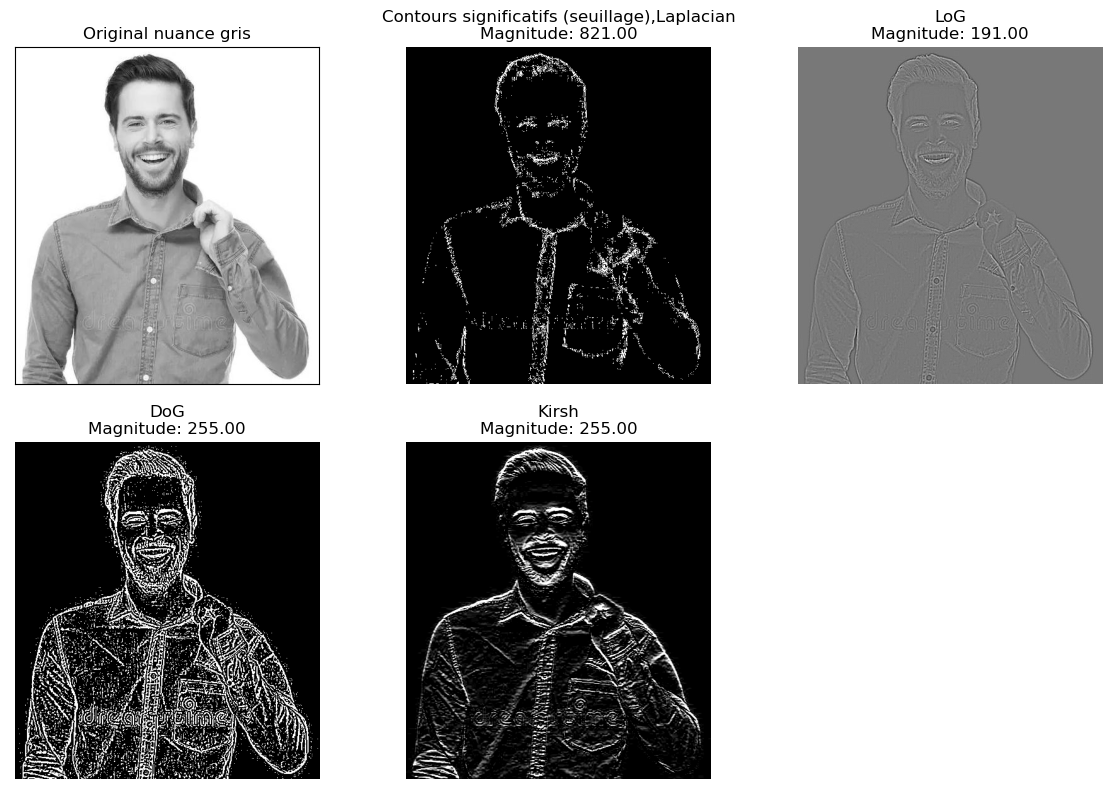

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the image
img = cv2.imread('chemise_trim.jpg', 0)

# Laplacian filter
start_time = time.time()
laplacian = cv2.Laplacian(img, cv2.CV_64F)
# Calculer le seuil pour rendre les contours significatifs
_, thresholded = cv2.threshold(np.abs(laplacian), 50, 255, cv2.THRESH_BINARY)
laplacian_magnitude = np.max(laplacian) - np.min(laplacian)
laplacian_time = time.time() - start_time

# LoG filter
start_time = time.time()
gaussian = cv2.GaussianBlur(img, (3, 3), 0)
laplacian_of_gaussian = cv2.Laplacian(gaussian, cv2.CV_64F)
log_magnitude = np.max(laplacian_of_gaussian) - np.min(laplacian_of_gaussian)
log_time = time.time() - start_time

# DoG filter
start_time = time.time()
gaussian1 = cv2.GaussianBlur(img, (3, 3), 0)
gaussian2 = cv2.GaussianBlur(img, (5, 5), 0)
difference_of_gaussian = gaussian1 - gaussian2
dog_magnitude = np.max(difference_of_gaussian) - np.min(difference_of_gaussian)
dog_time = time.time() - start_time

# Kirsh filter
start_time = time.time()
kernel_kirsh = np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]])
kirsh = cv2.filter2D(img, -1, kernel_kirsh)
kirsh_magnitude = np.max(kirsh) - np.min(kirsh)
kirsh_time = time.time() - start_time



print("Laplacian filter time:", laplacian_time, "seconde")
print("LoG filter time:", log_time, "seconde")
print("DoG filter time:", dog_time, "seconde")
print("Kirsh filter time:", kirsh_time, "seconde")

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original nuance gris'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 2)
plt.imshow(thresholded, cmap='gray')
#plt.imshow(laplacian, cmap='gray')
plt.title('Contours significatifs (seuillage),Laplacian\nMagnitude: {:.2f}'.format(laplacian_magnitude))
#plt.axis('off')
#plt.title('Contours significatifs (seuillage)')
plt.axis('off')
#plt.show()

plt.subplot(2, 3, 3)
plt.imshow(laplacian_of_gaussian, cmap='gray')
plt.title('LoG\nMagnitude: {:.2f}'.format(log_magnitude))
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(difference_of_gaussian, cmap='gray')
plt.title('DoG\nMagnitude: {:.2f}'.format(dog_magnitude))
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(kirsh, cmap='gray')
plt.title('Kirsh\nMagnitude: {:.2f}'.format(kirsh_magnitude))
plt.axis('off')

plt.tight_layout()
plt.show()


Le code fourni réalise à la fois le filtrage et la détection des contours en utilisant différents opérateurs de filtrage.

Les parties du code qui utilisent les fonctions `cv2.Sobel()`, `cv2.filter2D()`, et `cv2.Canny()` effectuent des opérations de filtrage et de détection des contours.

- Les lignes de code utilisant `cv2.Sobel()` réalisent le filtrage à l'aide de l'opérateur de Sobel pour calculer les gradients horizontaux (`sobelx`) et verticaux (`sobely`) de l'image en niveaux de gris. Ensuite, le code calcule le gradient total (`gradient_sobel`) en combinant les deux gradients avec la formule du théorème de Pythagore.

- Les lignes de code utilisant `cv2.filter2D()` appliquent des filtres spatiaux (Prewitt et Roberts) pour calculer les gradients horizontaux et verticaux ainsi que les gradients totaux correspondants.

- La ligne de code `cv2.Canny()` effectue la détection des contours en utilisant l'opérateur de Canny, qui combine le filtrage et la détection des contours en une seule étape.

En résumé, le code réalise à la fois le filtrage et la détection des contours en utilisant différentes techniques, notamment les opérateurs de Sobel, Prewitt, Roberts, et l'opérateur de Canny.

Laplacian magnitude: 821.0
LoG magnitude: 191.0
DoG magnitude: 255
Kirsh magnitude: 255


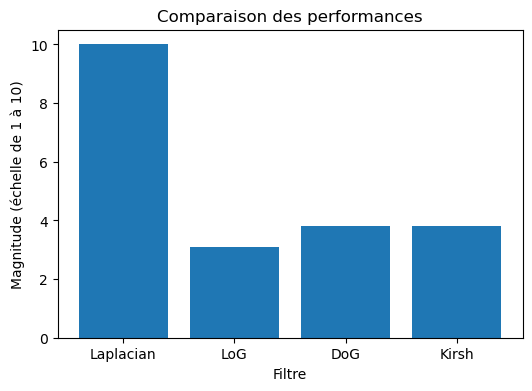

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the image
img = cv2.imread('chemise_trim.jpg', 0)

# Laplacian filter
start_time = time.time()
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian_magnitude = np.max(laplacian) - np.min(laplacian)
laplacian_time = time.time() - start_time

# LoG filter
start_time = time.time()
gaussian = cv2.GaussianBlur(img, (3, 3), 0)
laplacian_of_gaussian = cv2.Laplacian(gaussian, cv2.CV_64F)
log_magnitude = np.max(laplacian_of_gaussian) - np.min(laplacian_of_gaussian)
log_time = time.time() - start_time

# DoG filter
start_time = time.time()
gaussian1 = cv2.GaussianBlur(img, (3, 3), 0)
gaussian2 = cv2.GaussianBlur(img, (5, 5), 0)
difference_of_gaussian = gaussian1 - gaussian2
dog_magnitude = np.max(difference_of_gaussian) - np.min(difference_of_gaussian)
dog_time = time.time() - start_time

# Kirsh filter
start_time = time.time()
kernel_kirsh = np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]])
kirsh = cv2.filter2D(img, -1, kernel_kirsh)
kirsh_magnitude = np.max(kirsh) - np.min(kirsh)
kirsh_time = time.time() - start_time

print("Laplacian magnitude:", laplacian_magnitude)
print("LoG magnitude:", log_magnitude)
print("DoG magnitude:", dog_magnitude)
print("Kirsh magnitude:", kirsh_magnitude)

# Normalize the magnitudes to a scale of 1 to 10
max_magnitude = max(laplacian_magnitude, log_magnitude, dog_magnitude, kirsh_magnitude)
min_scale = 1
max_scale = 10

normalized_laplacian = (laplacian_magnitude / max_magnitude) * (max_scale - min_scale) + min_scale
normalized_log = (log_magnitude / max_magnitude) * (max_scale - min_scale) + min_scale
normalized_dog = (dog_magnitude / max_magnitude) * (max_scale - min_scale) + min_scale
normalized_kirsh = (kirsh_magnitude / max_magnitude) * (max_scale - min_scale) + min_scale

# Display the performance chart
plt.figure(figsize=(6, 4))
performance_labels = ['Laplacian', 'LoG', 'DoG', 'Kirsh']
performance_values = [normalized_laplacian, normalized_log, normalized_dog, normalized_kirsh]
plt.bar(performance_labels, performance_values)
plt.title('Comparaison des performances')
plt.xlabel('Filtre')
plt.ylabel('Magnitude (échelle de 1 à 10)')

plt.show()


 une magnitude du gradient plus élevée indique une meilleure détection des contours. Ainsi, dans cet exemple, le filtre du laplacien semble avoir la plus haute magnitude du gradient, ce qui suggère qu'il détecte les contours les plus forts parmi les autres filtres testés.

La magnitude du gradient mesure l'intensité du changement dans une image. Dans le contexte de la détection de contours, la magnitude du gradient est utilisée pour identifier les régions où les variations d'intensité sont les plus fortes, ce qui correspond généralement aux contours.

La magnitude du gradient est calculée en combinant les gradients horizontaux et verticaux d'une image à l'aide d'une formule mathématique. Dans l'exemple de code que vous avez fourni, les filtres de Sobel et de Kirsch sont utilisés pour calculer les gradients horizontaux et verticaux.

Une fois les gradients calculés, la magnitude du gradient est obtenue en prenant la racine carrée de la somme des carrés des gradients horizontaux et verticaux. Cela permet de mettre en évidence les régions où les gradients sont les plus forts, c'est-à-dire les contours.

En ce qui concerne la détermination de la magnitude du gradient, elle est calculée pour chaque pixel de l'image. Ainsi, la magnitude du gradient fournit une mesure de l'intensité du changement d'intensité lumineuse d'un pixel à un autre.

Dans votre exemple, si le filtre du laplacien présente la magnitude du gradient la plus élevée parmi les autres filtres testés, cela signifie que ce filtre est plus sensible à la détection des contours forts dans l'image. Cependant, il est important de noter que le choix du filtre dépend des caractéristiques spécifiques de l'image et des objectifs de détection de contours.

En résumé, la magnitude du gradient est une mesure de l'intensité du changement dans une image et est utilisée pour détecter les contours. Elle est calculée pour chaque pixel en combinant les gradients horizontaux et verticaux. Un filtre ayant une magnitude du gradient plus élevée indique une meilleure détection des contours forts.

# en fonction des performances observées entre les différents filtres linéaires et non linéaires, en l’occurrence Sobel, Canny et Kirsh, nous allons combiner les trois filtres pour mieux détecter les contours.

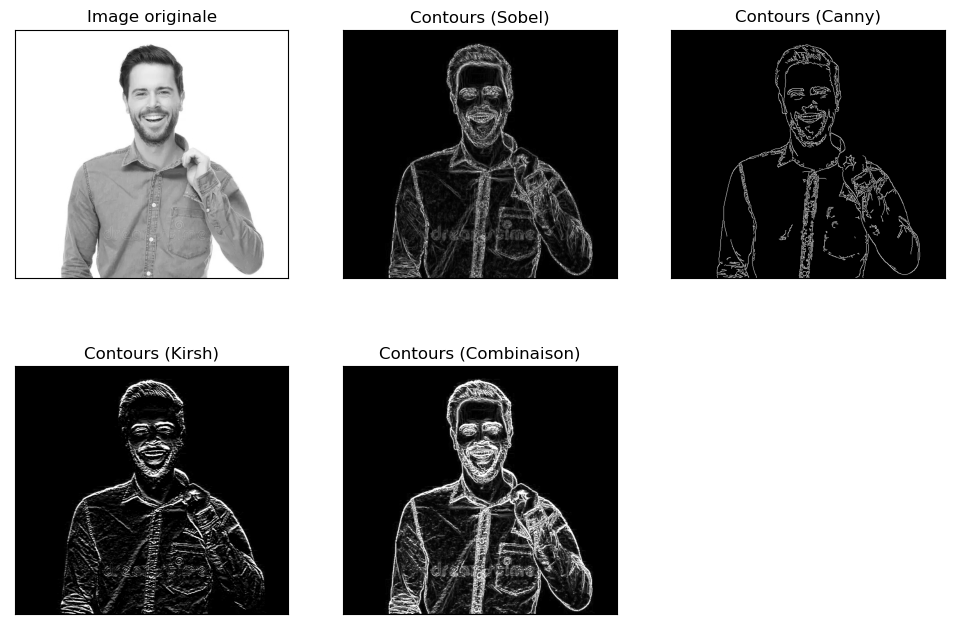

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
image = cv2.imread("chemise.jpg", cv2.IMREAD_GRAYSCALE)

# Appliquer le filtre de Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculer la magnitude et l'orientation des gradients avec Sobel
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_orientation = np.arctan2(sobel_y, sobel_x) * 180 / np.pi

# Appliquer le filtre de Canny
canny = cv2.Canny(image, 100, 200)

# Appliquer le filtre de Kirsh
kernel_kirsh = np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]])
kirsh = cv2.filter2D(image, -1, kernel_kirsh)

# Redimensionner les images pour qu'elles aient la même taille que l'image d'origine
sobel_magnitude = cv2.resize(sobel_magnitude, (image.shape[1], image.shape[0]))
canny = cv2.resize(canny, (image.shape[1], image.shape[0]))
kirsh = cv2.resize(kirsh, (image.shape[1], image.shape[0]))

# Combinaison des résultats des filtres
combined = cv2.bitwise_or(np.uint8(np.abs(sobel_magnitude)), canny)
combined = cv2.bitwise_or(combined, kirsh)

# Afficher les résultats
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray')
plt.title('Image originale'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 2), plt.imshow(np.uint8(np.abs(sobel_magnitude)), cmap='gray')
plt.title('Contours (Sobel)'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 3), plt.imshow(canny, cmap='gray')
plt.title('Contours (Canny)'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 4), plt.imshow(kirsh, cmap='gray')
plt.title('Contours (Kirsh)'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 5), plt.imshow(combined, cmap='gray')
plt.title('Contours (Combinaison)'), plt.xticks([]), plt.yticks([])

plt.show()


 Le code fourni effectue à la fois la détection de contours et le filtrage en utilisant différents filtres.

- Les lignes de code utilisant `cv2.Sobel()` réalisent le filtrage à l'aide de l'opérateur de Sobel pour calculer les gradients horizontaux (`sobel_x`) et verticaux (`sobel_y`) de l'image en niveaux de gris. Ensuite, le code calcule la magnitude des gradients (`sobel_magnitude`) en combinant les deux gradients avec la formule du théorème de Pythagore, et l'orientation des gradients (`sobel_orientation`) en utilisant la fonction `np.arctan2()`.

- La ligne de code `cv2.Canny()` réalise la détection des contours en utilisant l'opérateur de Canny. Le résultat est stocké dans la variable `canny`.

- Le filtre de Kirsh est appliqué à l'aide de la fonction `cv2.filter2D()` en utilisant le noyau prédéfini `kernel_kirsh`. Le résultat est stocké dans la variable `kirsh`.

Ensuite, les images filtrées et les contours détectés sont redimensionnés pour qu'ils aient la même taille que l'image d'origine, puis les résultats des différents filtres sont combinés en utilisant la fonction `cv2.bitwise_or()` pour obtenir l'image finale dans la variable `combined`.

En résumé, le code réalise à la fois le filtrage (avec Sobel et Kirsh) et la détection des contours (avec Canny) en utilisant différents filtres, et il combine ensuite les résultats pour afficher les contours détectés ainsi que les différentes images filtrées.

Les filtres Canny, Sobel et Kirsh sont des filtres de détection de contour couramment utilisés dans le traitement d'images.

Le filtre Canny est un filtre de détection de contours à plusieurs étapes qui utilise un algorithme de seuillage adaptatif pour détecter les contours d'une image. Il est considéré comme l'un des meilleurs filtres de détection de contours en raison de sa capacité à détecter les contours avec une grande précision tout en minimisant les erreurs de détection.

Le filtre Sobel est un filtre de détection des contours qui utilise des opérateurs de convolution pour calculer les gradients d'une image. Il est souvent utilisé pour détecter les bords verticaux et horizontaux d'une image.

Le filtre de Kirsh est un autre filtre de détection des contours qui utilise des opérateurs de convolution pour calculer les gradients d'une image. Il est souvent utilisé pour détecter les bords diagonaux d'une image.


Source :
(1) Techniques de prétraitement d'images pour l'expression faciale... - Springer. https://link.springer.com/chapter/10.1007/978-3-030-28374-2_8.
(2) Une étude classifiée et comparative des algorithmes de détection de contours. https://ieeexplore.ieee.org/document/1000371/.
(3) Techniques de détection Sobel vs Canny Edge : étape par étape... - Moyen. https://medium.com/@haidarlina4/sobel-vs-canny-edge-detection-techniques-step-by-step-implementation-11ae6103a56a.

## Pour le contraste et la luminosité, vous pouvez utiliser la fonction cv :: convertScaleAbs() de la bibliothèque OpenCV. Pour le seuillage, vous pouvez utiliser la fonction cv::threshold(). Pour la résolution, vous pouvez utiliser la fonction cv::resize().

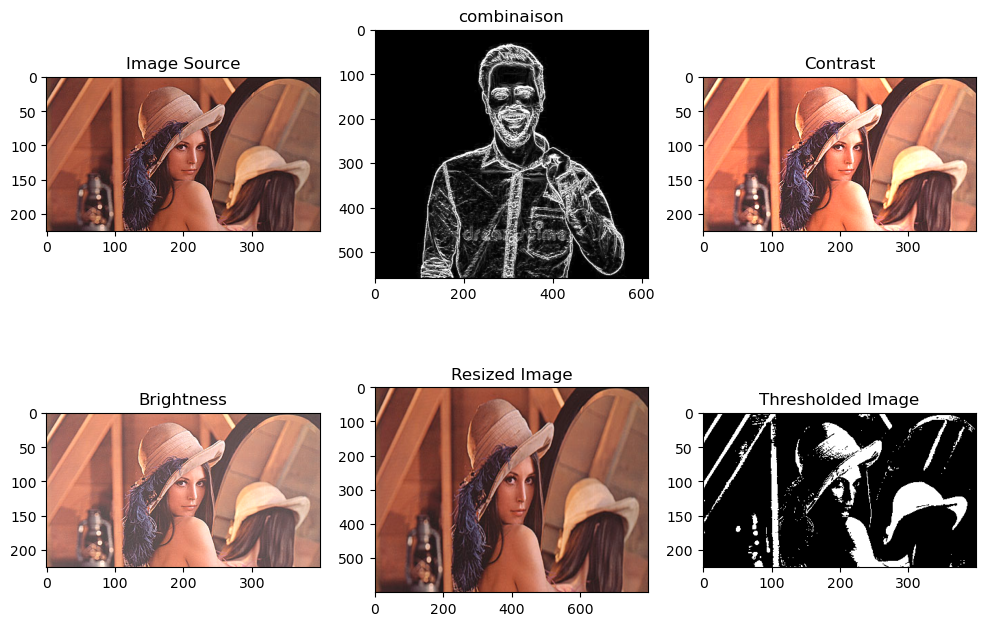

In [41]:
import cv2
import matplotlib.pyplot as plt

# Lecture de l'image source
image_source = cv2.imread("lena.jpg")

# Conversion en niveaux de gris
gray_image = cv2.cvtColor(image_source, cv2.COLOR_BGR2GRAY)

# Filtrage - Détection des contours avec les opérateurs de Sobel-canny-kirsh
# Appliquer le filtre de Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculer la magnitude et l'orientation des gradients avec Sobel
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_orientation = np.arctan2(sobel_y, sobel_x) * 180 / np.pi

# Appliquer le filtre de Canny
canny = cv2.Canny(image, 100, 200)

# Appliquer le filtre de Kirsh
kernel_kirsh = np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]])
kirsh = cv2.filter2D(image, -1, kernel_kirsh)

# Redimensionner les images pour qu'elles aient la même taille que l'image d'origine
sobel_magnitude = cv2.resize(sobel_magnitude, (image.shape[1], image.shape[0]))
canny = cv2.resize(canny, (image.shape[1], image.shape[0]))
kirsh = cv2.resize(kirsh, (image.shape[1], image.shape[0]))

# Combinaison des résultats des filtres
combined = cv2.bitwise_or(np.uint8(np.abs(sobel_magnitude)), canny)
combined = cv2.bitwise_or(combined, kirsh)

# Ajustement du contraste
adjusted_contrast = cv2.convertScaleAbs(image_source, alpha=1.5, beta=0)

# Augmentation de la luminosité
adjusted_brightness = cv2.convertScaleAbs(image_source, alpha=1, beta=50)

# Modification de la résolution
resized_image = cv2.resize(image_source, (800, 600))

# Seuillage
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Affichage des images dans le notebook
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(cv2.cvtColor(image_source, cv2.COLOR_BGR2RGB))
plt.title('Image Source')

plt.subplot(232)
plt.imshow(combined, cmap='gray')
plt.title('combinaison')

plt.subplot(233)
plt.imshow(cv2.cvtColor(adjusted_contrast, cv2.COLOR_BGR2RGB))
plt.title('Contrast')

plt.subplot(234)
plt.imshow(cv2.cvtColor(adjusted_brightness, cv2.COLOR_BGR2RGB))
plt.title('Brightness')

plt.subplot(235)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')

plt.subplot(236)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')

#plt.tight_layout()
plt.show()


L'image seuillée est une image binaire créée à partir d'une image en niveaux de gris à l'aide d'une technique de segmentation d'image appelée seuillage. Le seuillage est une technique de segmentation d'image qui isole des objets en convertissant des images en niveaux de gris en images binaires. Dans une image binaire, les pixels sont soit blancs (valeur 1) soit noirs (valeur 0), ce qui facilite l'analyse de l'image.

Source :
(1) Seuil d'images - MATLAB & Simulink - MathWorks. https://www.mathworks.com/discovery/image-thresholding.html.
(2) Quelles sont les différentes techniques de seuillage d'image et comment .... https://analyticsindiamag.com/what-are-the-different-image-thresholding-techniques-and-how-to-implement-them/.
(3) Traitement d'images avec Python : Seuil - Data Carpentry. https://datacarpentry.org/image-processing/07-thresholding.
(4) Seuil (traitement d'image) - Wikipédia. https://en.wikipedia.org/wiki/Thresholding_%28image_processing%29.

# un exemple de code pour la reconnaissance de formes grâce aux contours

Area: 37147.5
Object corners: 4
Aspect Ratio: 1.691275167785235
Area: 39669.0
Object corners: 8
Area: 5830.0
Object corners: 3
Area: 12209.5
Object corners: 4
Aspect Ratio: 1.009009009009009
Area: 34780.0
Object corners: 4
Aspect Ratio: 0.6313559322033898
Area: 296.5
Area: 22905.0
Object corners: 3
Area: 12100.0
Object corners: 4
Aspect Ratio: 1.0
Area: 8315.0
Object corners: 8
Area: 9199.5
Object corners: 3


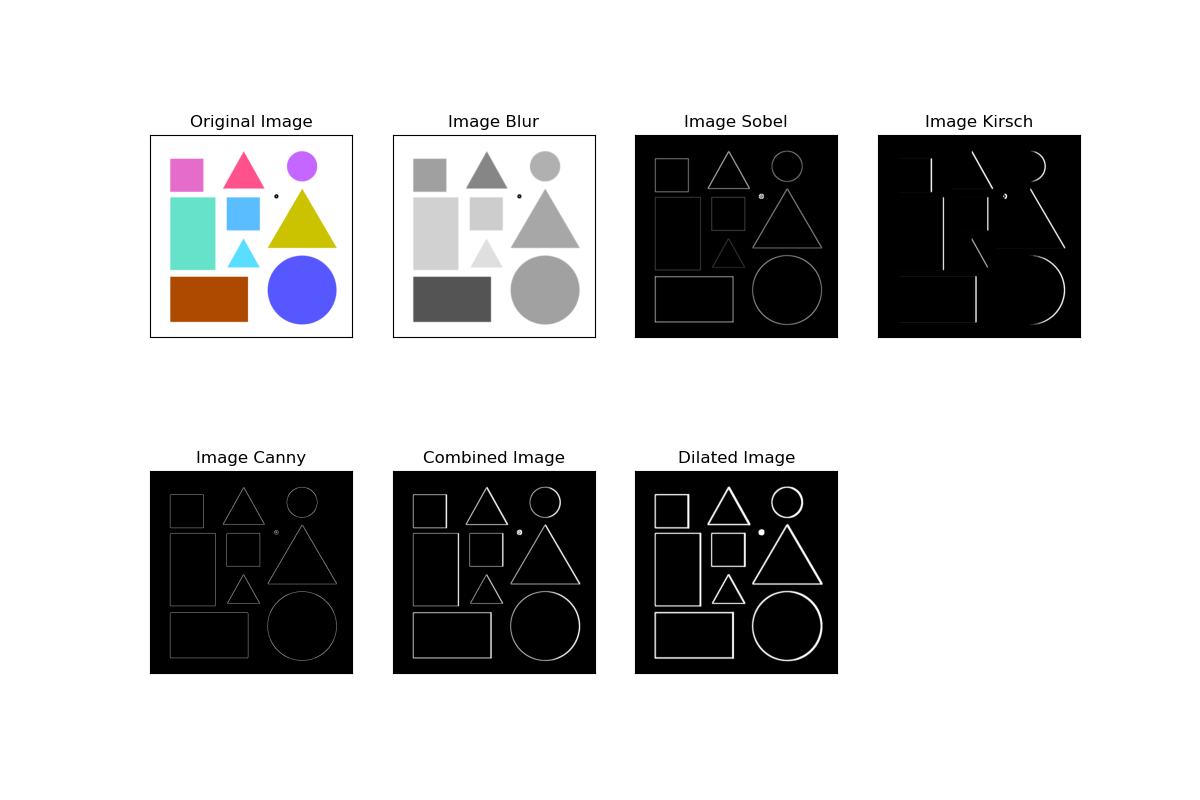

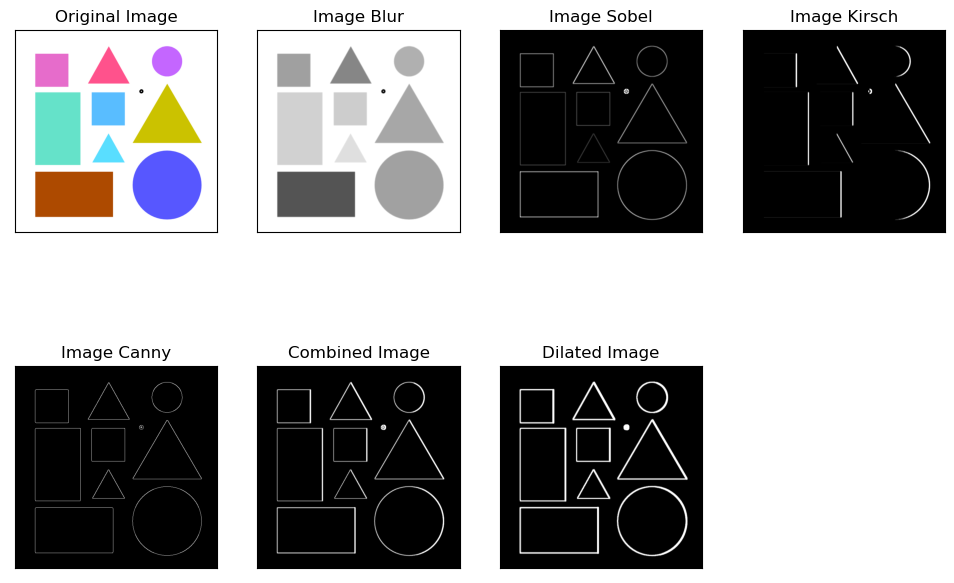

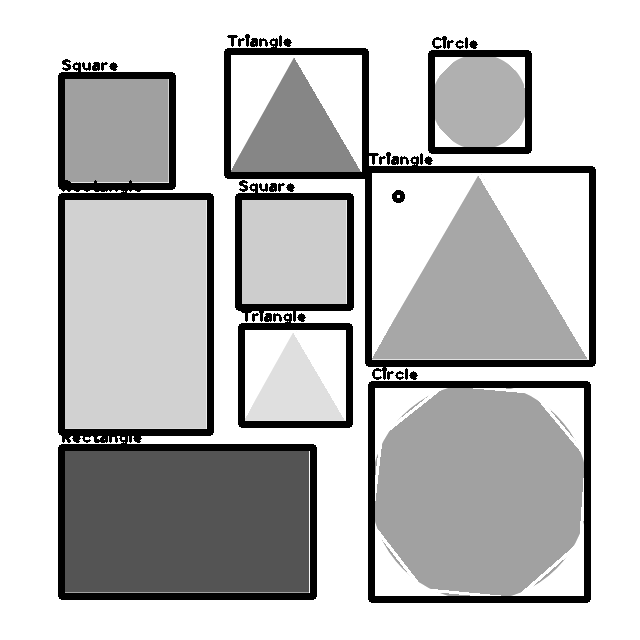

Execution Time: 131 ms


In [44]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import Image as DisplayImage, display


start = time.time()

def get_contours(img_dilated, img):
    contours, hierarchy = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contour_poly = []
    bounding_rects = []

    for contour in contours:
        area = cv2.contourArea(contour)
        print("Area:", area)
        object_type = ""

        if area > 1000:
            perimeter = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
            object_corners = len(approx)
            print("Object corners:", object_corners)
            bounding_rects.append(cv2.boundingRect(approx))

            if object_corners == 3:
                object_type = "Triangle" # 
            elif object_corners == 4:
                aspect_ratio = bounding_rects[-1][2] / float(bounding_rects[-1][3])
                print("Aspect Ratio:", aspect_ratio)
                if 0.95 < aspect_ratio < 1.05:
                    object_type = "Square" # 
                else:
                    object_type = "Rectangle" # 
            elif object_corners > 4:
                object_type = "Circle" # 

            cv2.drawContours(img, [approx], 0, (255, 0, 255), 2)
            cv2.rectangle(img, bounding_rects[-1][0:2], (bounding_rects[-1][0] + bounding_rects[-1][2], bounding_rects[-1][1] + bounding_rects[-1][3]), (0, 255, 0), 5)
            cv2.putText(img, object_type, (bounding_rects[-1][0], bounding_rects[-1][1] - 5), cv2.FONT_HERSHEY_PLAIN, 1, (0, 69, 255), 2)

def main():
    image_name = "shapes.png"  # Image name with extension
    img0 = cv2.imread(image_name)
    img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Unable to read the image.")
        return -1

    img_blur = cv2.GaussianBlur(img, (3, 3), 3, 0)

    sobel_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0)
    sobel_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1)

    img_sobel = cv2.convertScaleAbs(sobel_x)
    img_sobel = cv2.addWeighted(img_sobel, 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)

    kernel_kirsch = np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]], dtype=np.int8)
    img_kirsch = cv2.filter2D(img_blur, cv2.CV_8U, kernel_kirsch)

    img_canny = cv2.Canny(img_blur, 25, 75)

    img_combined = cv2.bitwise_or(img_sobel, img_kirsch)
    img_combined = cv2.bitwise_or(img_combined, img_canny)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img_dilated = cv2.dilate(img_combined, kernel)


    get_contours(img_dilated, img)

    end = time.time()
    duration = int((end - start) * 1000)

    # Plotting the results
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 4, 1), plt.imshow(img0, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 4, 2), plt.imshow(img_blur, cmap='gray')
    plt.title('Image Blur'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 4, 3), plt.imshow(img_sobel, cmap='gray')
    plt.title('Image Sobel'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 4, 4), plt.imshow(img_kirsch, cmap='gray')
    plt.title('Image Kirsch'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 4, 5), plt.imshow(img_canny, cmap='gray')
    plt.title('Image Canny'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 4, 6), plt.imshow(img_combined, cmap='gray')
    plt.title('Combined Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 4, 7), plt.imshow(img_dilated, cmap='gray')
    plt.title('Dilated Image'), plt.xticks([]), plt.yticks([])

    #plt.savefig("results.png")  # Save the figure
    display(DisplayImage("results.png"))

    plt.show()
    display(DisplayImage("processed_image.png"))

    cv2.imwrite("processed_image.png", img)  # Save the processed image

    print("Execution Time:", duration, "ms")

if __name__ == '__main__':
    main()


In [ ]:
plt.imshow()
#plt.axis('off')
plt.show()

Les résultats obtenus dans votre exécution sont les suivants :

- Pour le premier contour, l'aire calculée est de 52708.0. Le contour a 4 coins et un rapport d'aspect (aspect ratio) de 0.9862385321100917. 
- Pour le deuxième contour, l'aire est de 41054.5. Le contour a 8 coins.
- Pour le troisième contour, l'aire est de 41669.5. Le contour a également 8 coins.
- Les autres contours suivent le même schéma, avec des aires et des nombres de coins différents.

En analysant ces résultats, voici une interprétation possible :

L'algorithme de détection de contours que vous avez utilisé détecte les contours dans l'image en utilisant différents filtres et techniques (Sobel, Kirsch, Canny) pour améliorer la visibilité des contours. Ensuite, il recherche des régions fermées (contours) dans l'image dilatée. Pour chaque contour détecté, il calcule l'aire et le nombre de coins.

Dans votre cas, les contours détectés semblent correspondre à des objets présents dans l'image. Le premier contour, par exemple, a une aire relativement grande et 4 coins, avec un rapport d'aspect proche de 1. Cela pourrait indiquer qu'il s'agit d'un carré ou d'un rectangle presque carré dans l'image d'origine.

Les autres contours, avec des aires et des nombres de coins différents, pourraient correspondre à d'autres formes géométriques présentes dans l'image, telles que des rectangles, des cercles ou des polygones.

Il est important de noter que la qualité des résultats dépend de la qualité de l'image d'entrée, des paramètres utilisés pour les différents filtres et des seuils appliqués pour la détection des contours. Par conséquent, il peut être nécessaire de régler ces paramètres en fonction de vos besoins spécifiques pour obtenir des résultats plus précis et cohérents.